***Tool for Plotting the residual errors as a function of the error factor***
A folder is traversed for subfolders with files named "settings.txt". from there the observation file and the used error factor are extracted. The resulting residual error RMS is read from the file "residual_error_RMS.txt" saved in the same folder. Finally, for each observation file the relationship is plotted.

In [68]:
import os
import matplotlib.pyplot as plt
import re

In [69]:
residual_errors = {}
for root, dirs, files in os.walk("exp/konvergenz_vergleich_4"):
    path = root.split(os.sep)
    for file in files:
        if file == 'settings.txt':
            filepath = os.path.join(root, file)
            f = open(filepath, "r")
            settingsinfo = f.read()
            # print(settingsinfo)
            error_factor = re.search(r'error factor\n(.*?)\n', settingsinfo).group(1)
            observations_file = re.search(r'observations file: \n(.*?)\n', settingsinfo).group(1)
#             print(error_factor)
#             print(observations_file)
            f.close()
            if not (observations_file in residual_errors):
                residual_errors[observations_file] = {}
            filepath = os.path.join(root, 'residual_error_RMS.txt')
            f = open(filepath, "r")
            res_err = f.read()
            residual_errors[observations_file][error_factor] = (res_err, os.path.basename(root))
            f.close()
#             print(res_err)
#             print('\n')
            

('exp_20231027_174041', 'exp_20231027_174902', 'exp_20231027_175259', 'exp_20231027_175658', 'exp_20231027_180052', 'exp_20231027_180458', 'exp_20231027_180847')


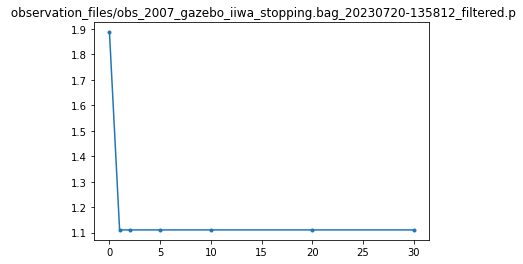

In [70]:
for i, obs_file in enumerate(residual_errors):
    fig, ax = plt.subplots(1, 1)
    x = []
    y = []
    exp_names = []
    for errfact in residual_errors[obs_file]:
        x.append(float(errfact))
        res_err, exp_name = residual_errors[obs_file][errfact]
        y.append(float(res_err))
        exp_names.append(exp_name)
    x, y, exp_names = zip(*sorted(zip(x, y, exp_names)))
    ax.plot(x,y, marker='.')
    print(exp_names)
    ax.set_title(obs_file)
    #print('\n')